# 3 - ARIMA Model Training Notebook 

In [2]:
import sys  
sys.path.insert(1, '/Users/simon/Documents/II/Dissertation/src')
import pandas as pd
import misc

%load_ext autoreload
%autoreload 2

Load the data

In [3]:
df = misc.load_processed_dataset("aapl", "2018-01-01", "2023-01-1")
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Close Forecast', 'Close_T-1', 'Close_T-2', 'Close_T-5', 'SMA_10',
       'SMA_20', 'SMA_50', 'EMA_10', 'EMA_20', 'EMA_50', 'RSI_14',
       'upper_band', 'middle_band', 'lower_band', 'macd', 'macdsignal',
       'macdhist', 'OBV', 'ADX', 'AD', 'Aroon_down', 'Aroon_up', 'SlowK',
       'SlowD', 'Williams %R', 'pct_change', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'S&P Close'],
      dtype='object')

Feature selection

In [4]:
features = ["Close", "Close Forecast"]
df = df[features]

Dataset splitting

In [5]:
X_train, X_test, Y_train, Y_test = misc.create_train_test_set(df, 0.8, verbose=False)

Model definition and training

In [13]:
from statsmodels.tsa.arima.model import ARIMA

history = [y for y in Y_train]
preds = []

for t in range(len(Y_test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    preds.append(output[0])
    history.append(Y_test[t])

preds = pd.Series(preds, index=Y_test.index)


/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_41029/419910045.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(Y_test[t])


Model predictions

Visualisation

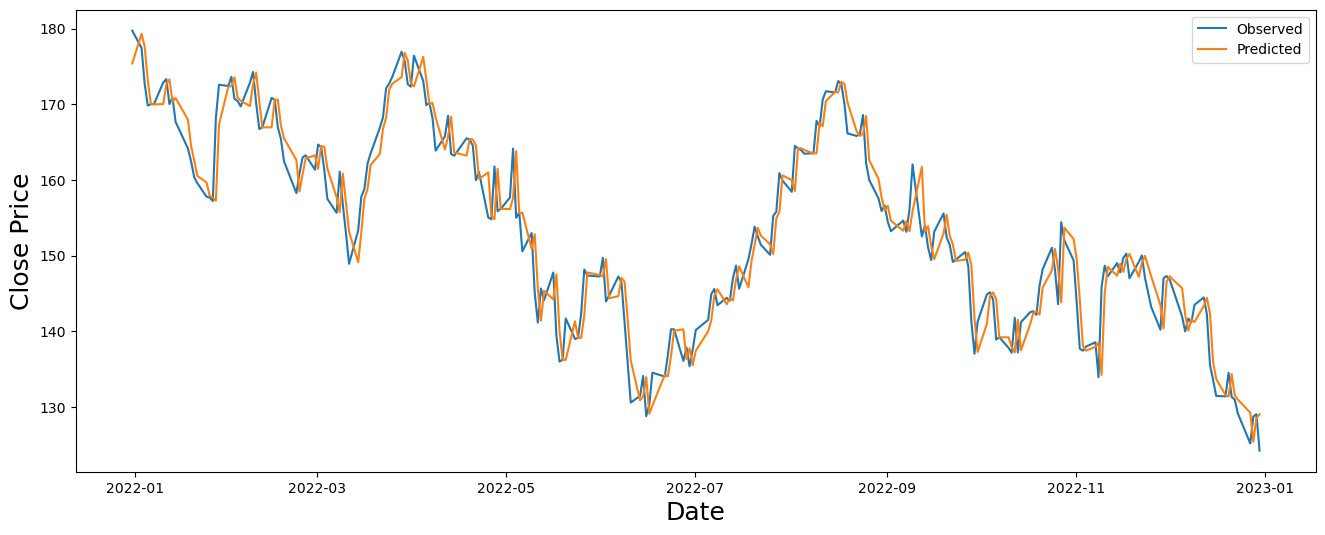

In [14]:
misc.plot(preds, Y_test)

Evaluate

In [15]:
misc.evaluate(preds, Y_test, verbose=True)

R^2: 0.9299650050528543
MSE: 11.543269648808014
RMSE: 3.397538763400355
MAE: 2.6515926874208606
MAPE: 1.7529854976638983


(0.9299650050528543,
 11.543269648808014,
 3.397538763400355,
 2.6515926874208606,
 1.7529854976638983)